In [1]:
from src.utils import *
from src.postprocess import rmsSpacial

# Análise das Malhas
- Time Schemes
- Spacial Schemes

### CircMesh


-----Time Schemes-----
- CranckNicolson: 3.261951391675481%
- backward: 3.2602428945689677%
- Euler: 3.3004664122129554%
-----Spacial Schemes-----
- linearUpwind: 2.5948015699578084%
- upwind: 44.04286368431573%
- limitedLinear: 5.117212613883781%


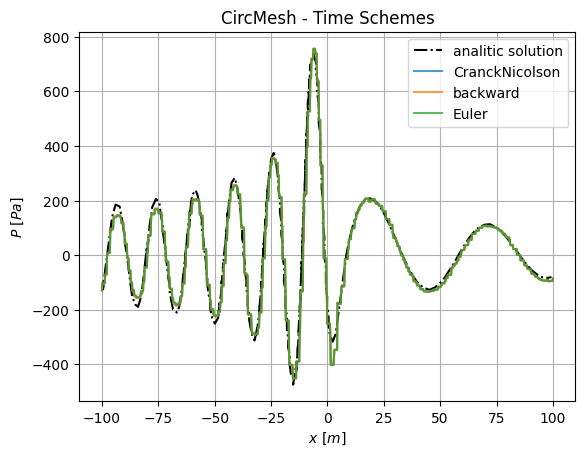

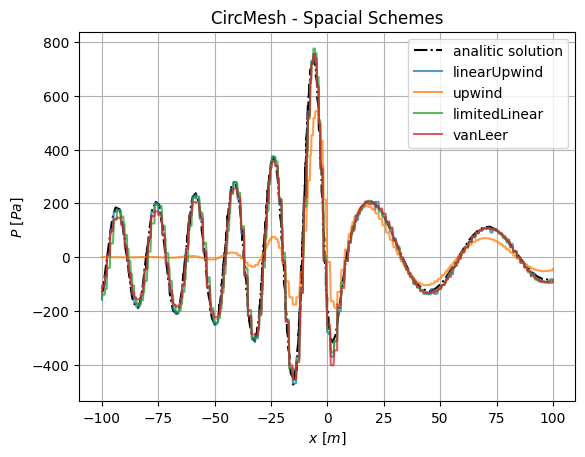

In [2]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='circMesh', test='timeTest')
psimS = importData(case = 'circMesh', test='spacialTest')

xa,pa = loadtxt(sol, unpack=True)
dic = {'Time Schemes':psimT, 'Spacial Schemes':psimS}
for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme])
        print(f'- {scheme}: {rms*100}%')
    
psimS.update({'vanLeer': psimT['backward']})

plotSchemes(psimT, analitc=sol, title='CircMesh - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='CircMesh - Spacial Schemes', save=True)



### quadMesh

-----Time Schemes-----
- CranckNicolson: 25.65120566677303%
- backward: 25.74713281531078%
- Euler: 23.16472222835672%
-----Spacial Schemes-----
- linearUpwind: 50.673513274483305%
- upwind: 44.852787267013404%
- limitedLinear: 6.635210164436582%


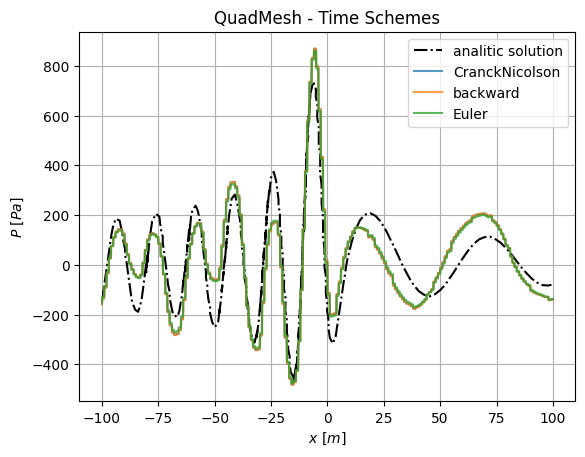

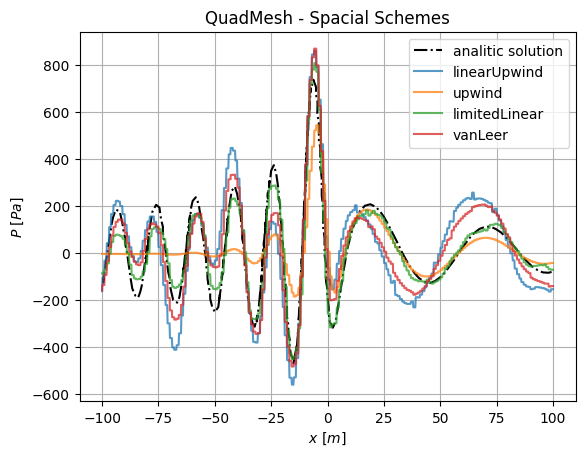

In [3]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='quadMesh', test='timeTest')
psimS = importData(case = 'quadMesh', test='spacialTest')

xa,pa = loadtxt(sol, unpack=True)
dic = {'Time Schemes':psimT, 'Spacial Schemes':psimS}
for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme])
        print(f'- {scheme}: {rms*100}%')

psimS.update({'vanLeer': psimT['backward']})

plotSchemes(psimT, analitc=sol, title='QuadMesh - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='QuadMesh - Spacial Schemes', save=True)

### newMesh0

-----Time Schemes-----
- CranckNicolson: 2.5447140682447427%
- backward: 2.5590602807799465%
- Euler: 2.5590602807799465%
-----Spacial Schemes-----
- linearUpwind: 2.1508352382599454%
- upwind: 26.22305348545814%
- limitedLinear: 3.8515881228110818%


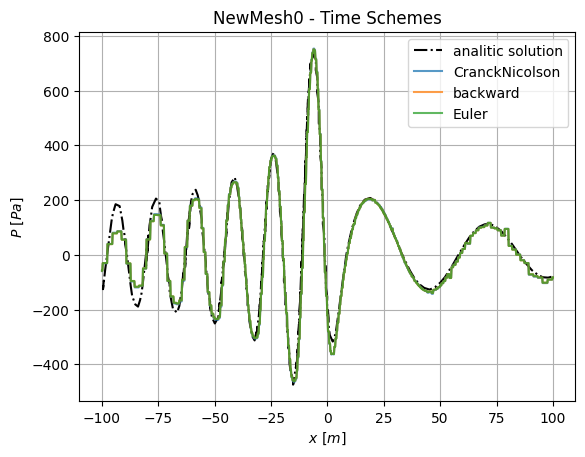

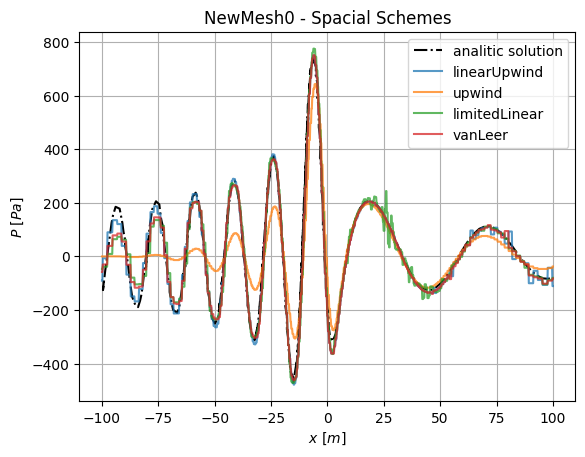

In [4]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='newMesh0', test='timeTest')
psimS = importData(case = 'newMesh0', test='spacialTest')

xa,pa = loadtxt(sol, unpack=True)
dic = {'Time Schemes':psimT, 'Spacial Schemes':psimS}
for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme])
        print(f'- {scheme}: {rms*100}%')

psimS.update({'vanLeer': psimT['backward']})

plotSchemes(psimT, analitc=sol, title='NewMesh0 - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='NewMesh0 - Spacial Schemes', save=True)

### newMesh 1

-----Time Schemes-----
- bakcward: 1.783752736249046%
- CrankNicolson: 1.6709986594371518%
- Euler: 1.5601486711673742%


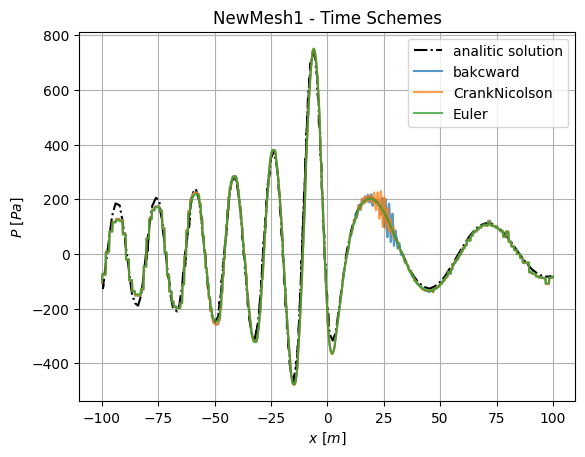

In [5]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='newMesh1', test='timeTest')
# psimS = importData(case = 'newMesh0', test='spacialTest')

xa,pa = loadtxt(sol, unpack=True)
dic = {'Time Schemes':psimT}
for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme])
        print(f'- {scheme}: {rms*100}%')

# psimS.update({'vanLeer': psimT['backward']})

plotSchemes(psimT, analitc=sol, title='NewMesh1 - Time Schemes', save=True)
# plotSchemes(psimS, analitc=sol, title='NewMesh0 - Spacial Schemes', save=True)

### meshStranger

-----Time Schemes-----
- backward: 1.6444299925341492%
- CrankNicolson: 1.6399109598021038%
- Euler: 1.65483779152742%
-----Spacial Schemes-----
- linearUpwind: 1.515402457513874%
- upwind: 16.59862285735205%
- limitedLinear: 3.022542087251893%


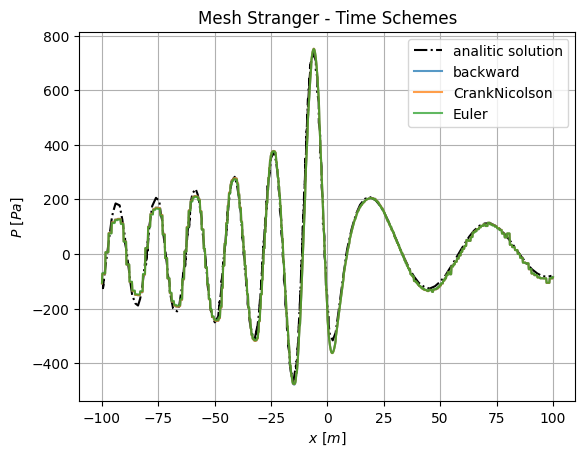

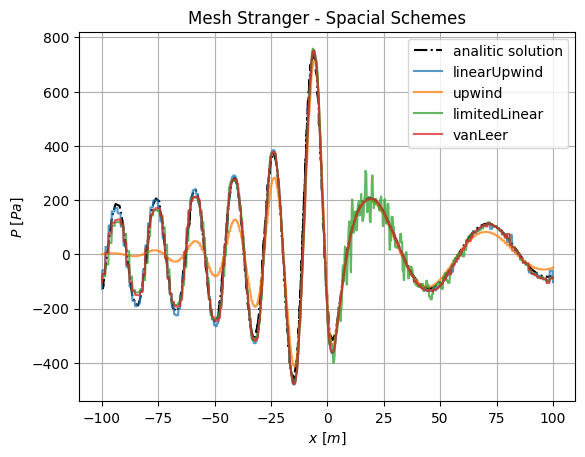

In [6]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='meshStranger', test='timeTest')
psimS = importData(case = 'meshStranger', test='spacialTest')

xa,pa = loadtxt(sol, unpack=True)
dic = {'Time Schemes':psimT, 'Spacial Schemes':psimS}
for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme])
        print(f'- {scheme}: {rms*100}%')

psimS.update({'vanLeer': psimT['backward']})

plotSchemes(psimT, analitc=sol, title='Mesh Stranger - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='Mesh Stranger - Spacial Schemes', save=True)